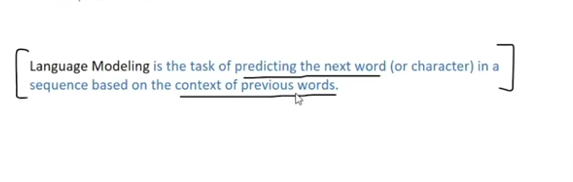

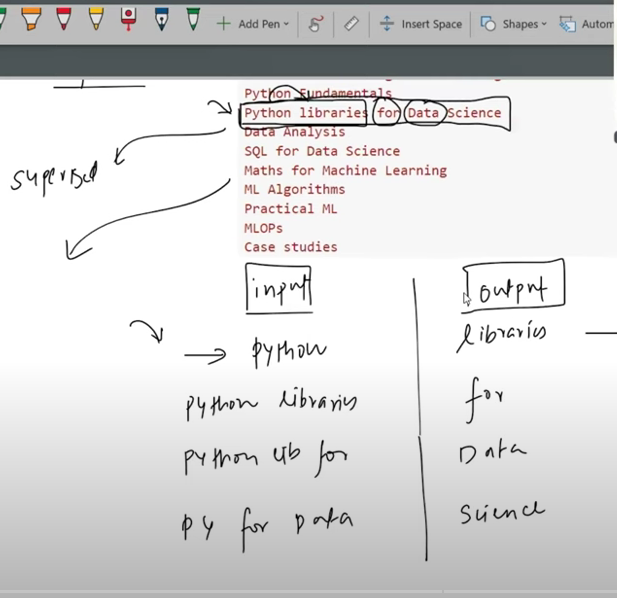

In [30]:
import nltk
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from nltk.corpus import reuters
from nltk import bigrams,ConditionalFreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('all')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_pe

True

In [31]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [32]:
document = reuters.sents()

In [33]:
document[:1500]

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

In [34]:
#building vocab

In [35]:

tokens = [token for sentence in document for token in sentence]

# Initialize vocab with 'unk' token
vocab = {'unk': 0}

# Build vocab from unique tokens
for token in Counter(tokens).keys():
    token = token.lower()
    if token not in vocab:
        vocab[token] = len(vocab)


In [36]:
len(vocab)

31078

In [37]:
document = document[:500]

In [38]:
# Flattened sentence list

def text_to_indices(sentence, vocab):
    numerical_sentence = []
    for token in sentence:
        token = token.lower()  # lowercase for matching vocab
        if token in vocab:
            numerical_sentence.append(vocab[token])
        else:
            numerical_sentence.append(vocab['unk'])
    return numerical_sentence

input_numerical_sentences= []

# Process each sentence
for sentence in document:

    input_numerical_sentences.append(text_to_indices(sentence, vocab))




In [39]:
len(input_numerical_sentences)

500

#formation of sequence

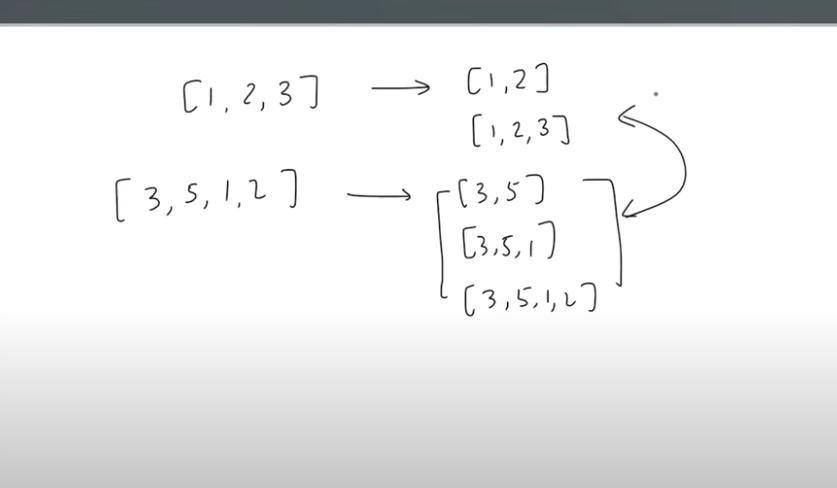

In [40]:
training_seqeunce = []
for sentence in input_numerical_sentences:
  for i in range(1,len(sentence)):
    training_seqeunce.append(sentence[:i+1])



In [41]:
len(training_seqeunce)

14532

In [42]:
len_list = []
for sequence in training_seqeunce:
  len_list.append(len(sequence))
max(len_list)

169

In [43]:
added_training_sequence = []
for sequence in training_seqeunce :

  added_training_sequence.append([0] *  (max(len_list) - len(sequence)) + sequence)

In [44]:
len(added_training_sequence[2])

169

In [45]:
import torch
padded_training_sequence = torch.tensor(added_training_sequence, dtype=torch.long)

In [46]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [47]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self,X,y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]



In [48]:
dataset = CustomDataset(X,y)


In [49]:
len(dataset)

14532

In [50]:
dataset[1]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]),
 tensor(3))

In [51]:
dataloader = DataLoader(dataset,batch_size = 32,shuffle =True)

In [52]:
for inp,out in dataloader:
  print(inp,out)
  break

tensor([[   0,    0,    0,  ...,  662,  333,   54],
        [   0,    0,    0,  ...,   25, 1316,   17],
        [   0,    0,    0,  ..., 1345,  532,    7],
        ...,
        [   0,    0,    0,  ...,   80, 1156, 1357],
        [   0,    0,    0,  ...,    8,    7,  501],
        [   0,    0,    0,  ..., 1343,  481,    7]]) tensor([1409, 2040,  227, 2032,  680,  493,  133, 2341,  592,   36,  983,   44,
        2380,   17, 1007,  453,  373,   46,   39,  426,    7,  250, 1053,   61,
          54, 1080, 1952,  227,  227,  259,   23, 1344])


In [53]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [54]:
model  = LSTMModel(len(vocab))

In [55]:
device = torch.device("cuda" if  torch.cuda.is_available() else "cpu" )


In [56]:
model.to(device)

LSTMModel(
  (embedding): Embedding(31078, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=31078, bias=True)
)

In [57]:
epochs = 100
l_r =0.001
criterion = nn.CrossEntropyLoss()

optimizer=  torch.optim.Adam(model.parameters(),lr= l_r)



In [58]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 3253.2986
Epoch: 2, Loss: 2668.3379
Epoch: 3, Loss: 2384.5507
Epoch: 4, Loss: 2119.1154
Epoch: 5, Loss: 1866.6832
Epoch: 6, Loss: 1630.8757
Epoch: 7, Loss: 1411.6794
Epoch: 8, Loss: 1210.9063
Epoch: 9, Loss: 1028.3922
Epoch: 10, Loss: 867.6397
Epoch: 11, Loss: 730.6200
Epoch: 12, Loss: 614.0496
Epoch: 13, Loss: 512.8610
Epoch: 14, Loss: 427.2967
Epoch: 15, Loss: 354.6163
Epoch: 16, Loss: 294.8741
Epoch: 17, Loss: 246.6063
Epoch: 18, Loss: 205.8538
Epoch: 19, Loss: 170.8608
Epoch: 20, Loss: 144.2975
Epoch: 21, Loss: 123.9394
Epoch: 22, Loss: 105.9527
Epoch: 23, Loss: 93.4987
Epoch: 24, Loss: 83.5662
Epoch: 25, Loss: 75.7888
Epoch: 26, Loss: 69.5117
Epoch: 27, Loss: 64.9570
Epoch: 28, Loss: 61.7481
Epoch: 29, Loss: 60.0166
Epoch: 30, Loss: 58.1180
Epoch: 31, Loss: 53.7377
Epoch: 32, Loss: 51.7269
Epoch: 33, Loss: 50.2574
Epoch: 34, Loss: 48.8132
Epoch: 35, Loss: 58.3948
Epoch: 36, Loss: 74.8304
Epoch: 37, Loss: 52.4563
Epoch: 38, Loss: 46.1628
Epoch: 39, Loss: 44.7731
Epo

In [59]:
def prediction(model, vocab, text):
    # Get the device the model is on (CPU or GPU)
    device = next(model.parameters()).device

    # Tokenize the input text
    tokenized_text = word_tokenize(text.lower())

    # Convert tokens to numerical indices
    numerical_text = text_to_indices(tokenized_text, vocab)

    # Pad the sequence to fixed length (e.g., 61)
    padded = [0] * (61 - len(numerical_text)) + numerical_text
    padded_text = torch.tensor(padded, dtype=torch.long).unsqueeze(0).to(device)  # move to model's device

    # Get model output
    with torch.no_grad():
        output = model(padded_text)

    # Get the predicted index
    _, index = torch.max(output, dim=1)

    # Get the predicted label/key (if vocab maps to class labels)
    predicted_label = list(vocab.keys())[index.item()]

    return f"{text} → {predicted_label}"


In [60]:
import time

num_tokens = 10
input_text = "Last year South korea"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


Last year South korea → had
Last year South korea → had → a
Last year South korea → had → a → three
Last year South korea → had → a → three → in
Last year South korea → had → a → three → in → an
Last year South korea → had → a → three → in → an → arbitration
Last year South korea → had → a → three → in → an → arbitration → said
Last year South korea → had → a → three → in → an → arbitration → said → the
Last year South korea → had → a → three → in → an → arbitration → said → the → year
Last year South korea → had → a → three → in → an → arbitration → said → the → year → from
